Alright!

This will be a first attempt at data exploration using the Kaggle House Prices (Advanced Regression) dataset.

Thanks to Pedro Marcelino ([link](https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python/notebook)) for the inspiration and guidance. 

His analysis is based largely on Hair et al. (2013) ([Examining your data](https://www.amazon.com/gp/product/9332536503/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=9332536503&linkCode=as2&tag=pmarcelino0b-20&linkId=ab279fb29582571ebfa89e6e8b95c50a)), which provides a great comprehesive approach to data cleansing:

1.  Understand the problem
2.  Univaraible study (focus on dependent variable)
3.  Multivariate study 
3.  Basic cleaning (handle missing data, outliers and categorical variables)
5.  Test assumptions (there are numerous assumptions required by most multivariate techniques)
    - Normality (data should look like a normal distribution)
    - Homoscedasticity (dependent varaible(s) exhibit equal levels of variance across a range of predictor variables)
    - Linearity (if patterns are not linear, it would be worthwhile to explore data transformations)
    - Absence of correlated errors 

Starting off, we want to import all the relevant libraries:

In [23]:
import pandas as pd                                 # Python library for handling structured data
from pathlib import Path                            # Clean way to work with file and folder paths
import matplotlib.pyplot as plt                     # Loads matplotlib's pypolot module for plotting graphs
import seaborn as sns                               # Statistically plotting library built on top of Matplotlib
import numpy as np                                  # Fundamental library for arrays and numerical operations
from scipy.stats import norm                        # Normal distribution object from SciPy's stats module
from sklearn.preprocessing import StandardScaler    # Tool to standardise data from scikitlearn
from scipy import stats                             # Loads stats function (e.g. t-tests, correlations, distributions)
%matplotlib inline
# ^^ Makes Matplotlib plots appear inside the notebook (can zoom) ^^

# Step 1: Visualising our data

Now, we want to import our data into the notebook and make it easily accessible by labelling it using pandas

We then want to print out the shape of the training (and test) sets, and have a taster for what the first 5 rows look like

In [20]:
data_raw = Path("..") / "data" / "raw"
train = pd.read_csv(data_raw / "train.csv")
test = pd.read_csv(data_raw / "test.csv")

print("Train shape:", train.shape)
print("Test shape:", test.shape)

train.head(5)          # Shows the first 5 rows of the training set

Train shape: (1460, 81)
Test shape: (1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Now let's have a look at the variables:

In [25]:
list(train.columns)


['Id',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF'

Now, lets have a look at the descriptive statistics for our output variable, 'SalePrice'

In [44]:
train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

<Axes: xlabel='SalePrice', ylabel='Count'>

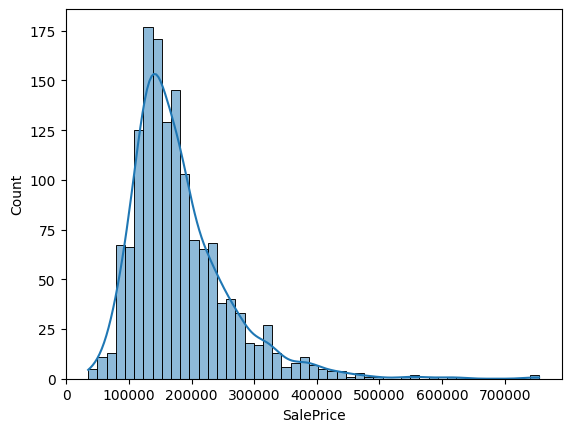

In [48]:
sns.histplot(train['SalePrice'], kde=True)

In [49]:
print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


<u>For context:</u>

Skewness rule of thumb:  
	•	0 → symmetric (normal)  
	•	Between -0.5 and +0.5 → fairly symmetric  
	•	Between ±0.5 and ±1 → moderately skewed  
	•	Beyond ±1 → highly skewed  


Kurtosis rule of thumb:  
	•	Highter than 3 = leptokurtic (sharp peak, heavy tails, more outliers)  
	•	Lower than 3 = platykurtic (flatter, light tails)  

Great! Now that we have had a look at SalesPrice, we can start to investigate its relationship with some numerical variables of interest

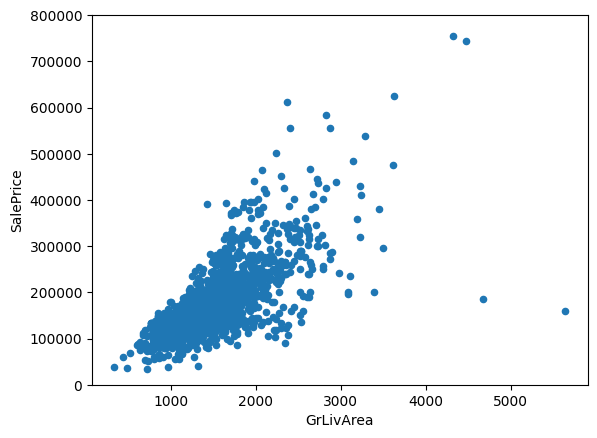

In [61]:
#scatter plot grlivarea/saleprice

data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

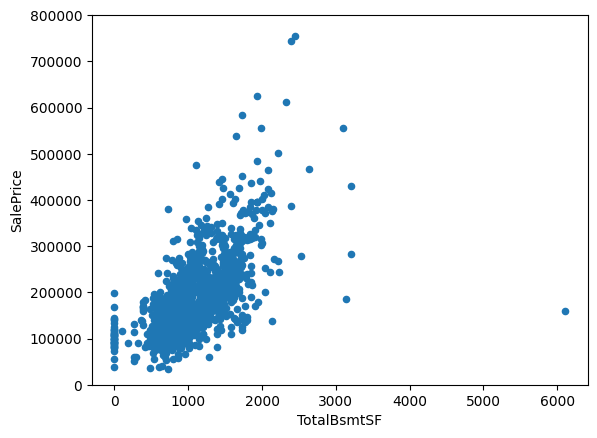

In [62]:
data =pd.concat([train['SalePrice'], train['TotalBsmtSF']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='TotalBsmtSF', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

Note: Clearly there are a few instances of TotalBsmtSF = 0

Now, lets look at the relationship between SalePrice and some categorical features

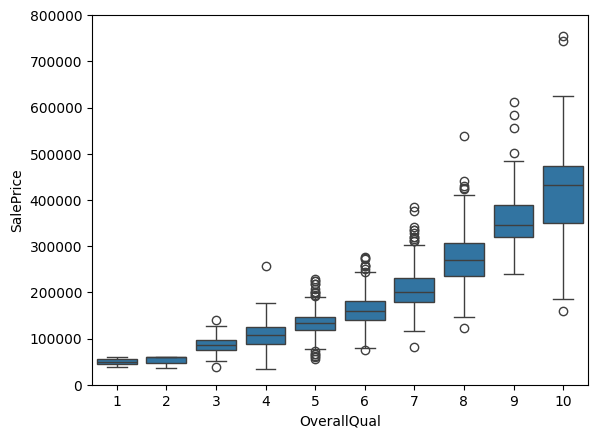

In [69]:
#boxplot overallqual/saleprice

data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data)  # Create a boxplot with OverallQual on the x-axis and SalePrice on the y-axis
fig.axis(ymin=0, ymax=800000);                                    # Set the y-axis limits



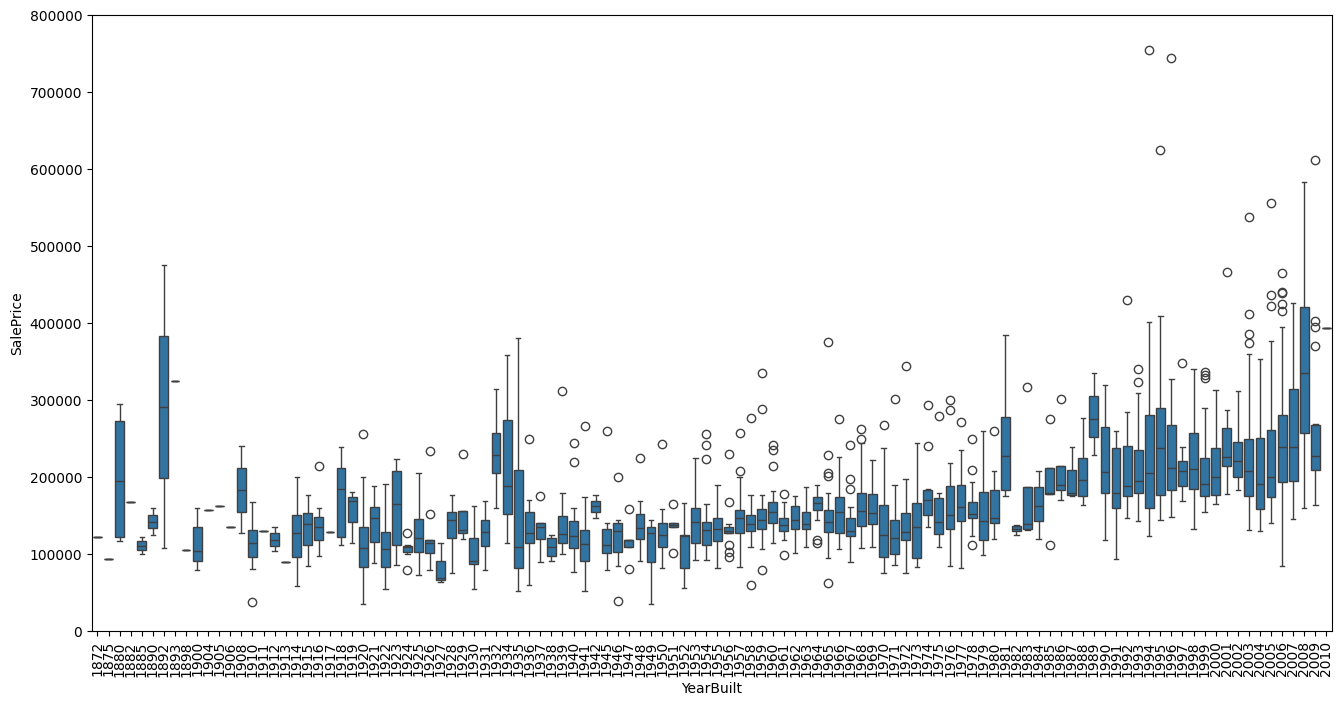

In [73]:
data = pd.concat([train['SalePrice'], train['YearBuilt']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='YearBuilt', y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

We are already starting to observe some very interesting relationships, but we have been selective in choosing which variables to work with.

#### Now, lets move onto the **'Plasma Soup'**, where we look at the relationships between **all** variables

To explore the universe of data we have, lets use the following methods:

- Correlation matrix (heatmaps style)
- 'SalePrice' correlation matrix (zoomed heatmap style)
- Scatter plots between the most correlated variables

In [82]:
##First we need to filter out all non-numerical variables
numeric_train = train.select_dtypes(include=[np.number])  # Select only numerical features

## Then we want to print the columns we are keeping, and those we are dropping
print("Numerical features:")
for col in numeric_train.columns:
    print("-", col)

dropped_features = set(train.columns) - set(numeric_train.columns)
print("\nDropped (categorical) features:")
for col in dropped_features:
    print("-", col)

Numerical features:
- Id
- MSSubClass
- LotFrontage
- LotArea
- OverallQual
- OverallCond
- YearBuilt
- YearRemodAdd
- MasVnrArea
- BsmtFinSF1
- BsmtFinSF2
- BsmtUnfSF
- TotalBsmtSF
- 1stFlrSF
- 2ndFlrSF
- LowQualFinSF
- GrLivArea
- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath
- BedroomAbvGr
- KitchenAbvGr
- TotRmsAbvGrd
- Fireplaces
- GarageYrBlt
- GarageCars
- GarageArea
- WoodDeckSF
- OpenPorchSF
- EnclosedPorch
- 3SsnPorch
- ScreenPorch
- PoolArea
- MiscVal
- MoSold
- YrSold
- SalePrice

Dropped (categorical) features:
- Neighborhood
- RoofStyle
- PavedDrive
- LotShape
- GarageFinish
- BsmtQual
- Alley
- LotConfig
- BsmtFinType2
- Exterior1st
- Exterior2nd
- SaleCondition
- Electrical
- Foundation
- HeatingQC
- Heating
- CentralAir
- ExterQual
- FireplaceQu
- Condition2
- GarageQual
- Condition1
- LandSlope
- BsmtExposure
- GarageCond
- MiscFeature
- GarageType
- SaleType
- KitchenQual
- LandContour
- BsmtCond
- RoofMatl
- PoolQC
- HouseStyle
- Fence
- BldgType
- MasVnrType
- 

<Axes: >

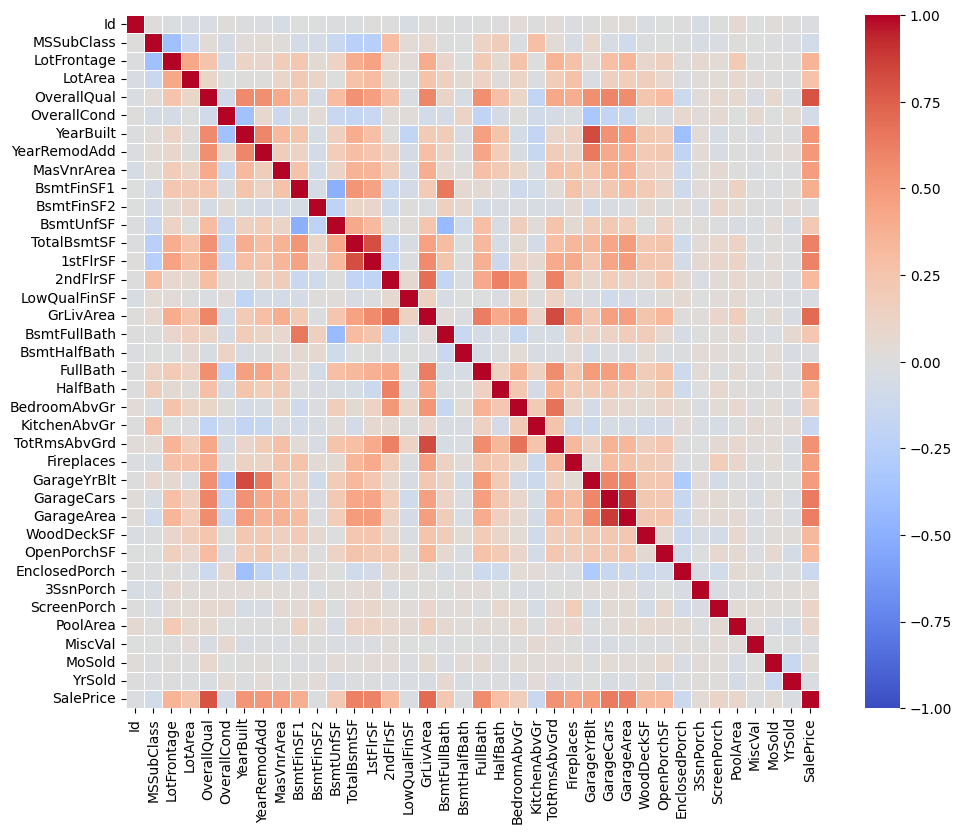

In [85]:
# Now we can plot the correlation matrix

corrmat = numeric_train.corr()  # Compute the correlation matrix for the training set
f, ax = plt.subplots(figsize=(12, 9))  # Create a figure and axis object with specified size

sns.heatmap(
    corrmat, 
    cmap="coolwarm",        # blue = negative, red = positive
    vmin=-1, vmax=1,        # force scale to -1...1
    center=0,               # make 0 the neutral midpoint
    square=True, 
    linewidths=0.5, 
    annot=False             # set to True if you want numbers on the cells
)

This heatmap is a great way to get a quick overview of our 'plasma soup':

- Each square shows the correlations between two variables in the dataset
- The variables are listed on both the x-axis and the y-axis, so the plot is **symmetric**
- The color of each cell tells us the strength and direction of the correlation:
    - Darker colours indicate stronger correlation
    - Brighter colours indicate a weaker correlation
- The diagonal is always 1.0, because a variable always correlates perfectly with itself
- It is important to **use this to spot multicollinearity** (e.g. variables that are highly correlated with eachother, lik GarageCars and GarageArea)


Findings:
- TotalsmtSF and 1stFlrSF are strongly correlated
- GarageX variables are strongly correlated
- Strong correlation between 'SalePrice' and GrLivArea, Total BsmtSF, and OverallQual


Now, lets move on to make a more focused correllation heatmap, showing only the TEN variables most correlated to SalePrice

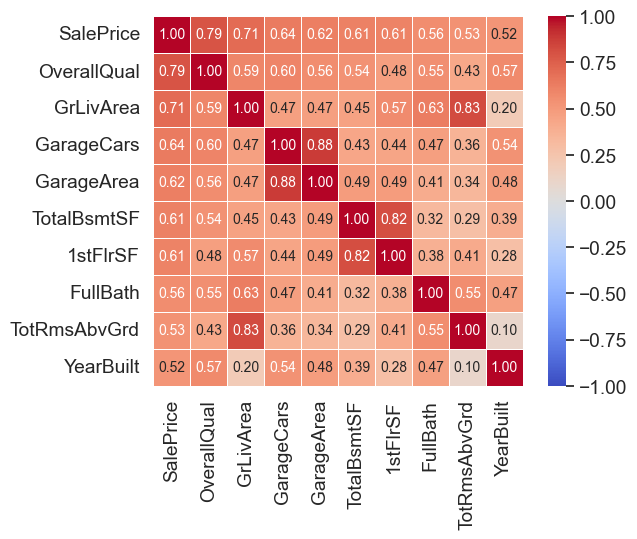

In [93]:
k = 10
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index # Get the names of the k features most correlated with SalePrice
cm = np.corrcoef(numeric_train[cols].values.T) # Compute the correlation matrix for the selected columns
sns.set_theme(font_scale=1.25) # Set the font scale for the heatmap
hm = sns.heatmap(
    cm,         # The correlation matrix
    cbar=True,  # Show the color bar
    annot=True, # Annotate the cells with the correlation values
    square=True,# Make the cells square
    fmt='.2f',  # Format the annotation to 2 decimal places
    annot_kws={'size': 10}, # Set the annotation font size
    yticklabels=cols.values, # Set the y-axis tick labels to the column names
    xticklabels=cols.values,  # Set the x-axis tick labels to the column names
    cmap="coolwarm",   # diverging scheme
    vmin=-1, vmax=1,   # fix scale from -1 to 1
    center=0,          # put 0 in the middle
    linewidths=0.5     # add lines between cells
)
plt.show()

Great! Some interesting takeaways:

- 'OverallQual', 'GrLivArea' and 'TotalBsmtSF' are strongly correlated with 'SalePrice
- 'GarageCars' and 'GarageArea' are also some of the most strongly correlated variables. We only need one of them, because they pretty much tell us the same thing. We can keep GarageCars, because its correlation with SalePrice is higher
- 'TotRmsAbvGrd' and 'GrLivArea' are also 'sister' variables

Now, lets make scatter plots to show all of these relationships. **This is a very very good graph to use**

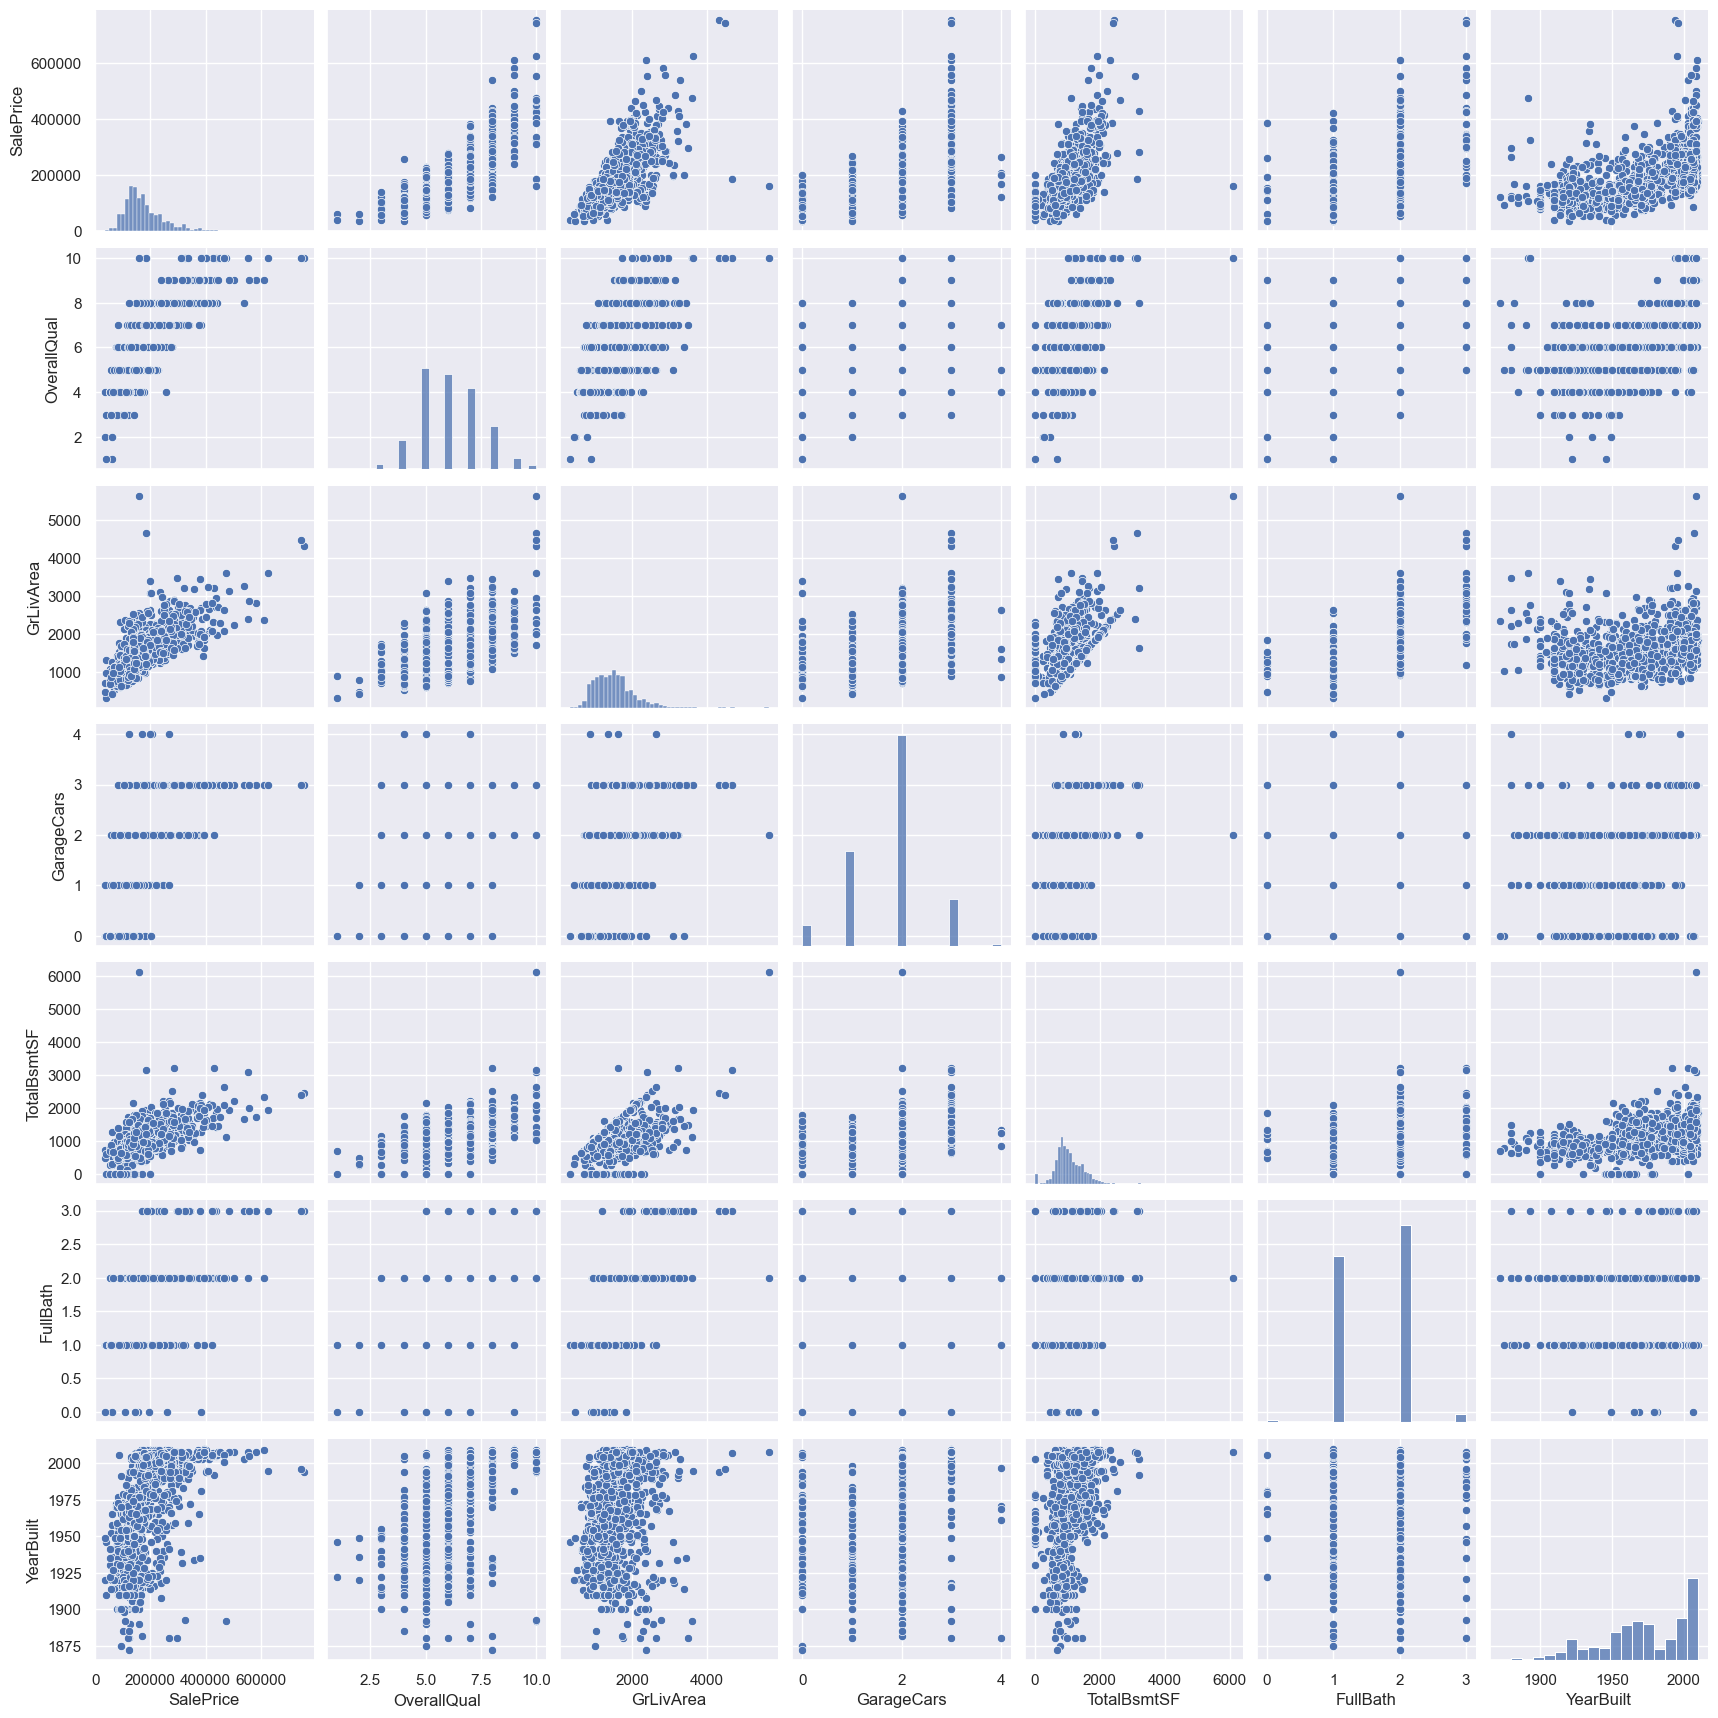

In [105]:
#scatterplot
sns.set_theme() # Reset the theme to default
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt'] # List of columns to plot
sns.pairplot(train[cols], size = 2.5, diag_kind="hist")  # Create a pairplot of the selected columns with a specified size
plt.show(); # Display the plot

In the above:
- Each row/column corresponds to one variable.
- Off-diagonal cells show scatterplots between two variables.
- **Diagonal cells show a histogram of that variable itself**


# Section 2: Dealing with Missing Data

- We want to know how prevalent missing data is
- We want to know if missing data is RANDOM, or if it has a problem

In [113]:
# missing data
total = train.isnull().sum().sort_values(ascending=False)  # Calculate the total number of missing values for each column and sort in descending order
percent = (train.isnull().sum()/train.isnull().count()*100).sort_values(ascending=False)  # Calculate the percentage of missing values for each column and sort in descending order
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])  # Concatenate the total and percent Series into a new DataFrame

# Now we want to find the correlation with SalePrice of all numerical variables with missing data
missing_data = missing_data[missing_data['Total'] > 0]  # Filter the DataFrame to include only columns with missing data
missing_data = missing_data.join(numeric_train.corr()['SalePrice'], how='left')  # Join the correlation with SalePrice to the missing data DataFrame
missing_data = missing_data.rename(columns={'SalePrice': 'Correlation with SalePrice'})  # Rename the correlation column for clarity

missing_data.head(30)  # Display the top 30 rows of the missing data DataFrame



,Total,Percent,Correlation with SalePrice
PoolQC,1453,99.520548,NaN
MiscFeature,1406,96.301370,NaN
Alley,1369,93.767123,NaN
Fence,1179,80.753425,NaN
MasVnrType,872,59.726027,NaN
FireplaceQu,690,47.260274,NaN
LotFrontage,259,17.739726,0.351799
GarageYrBlt,81,5.547945,0.486362
GarageCond,81,5.547945,NaN
GarageType,81,5.547945,NaN


Now, lets analyse our findings above:

- Firstly, lets say that when more than 15% of data is missing, we should delete the corresponding variable and pretend it never existed
- This means that all variables from PoolQC to LotFrontage are GONE
- Also, the GarageX variables are each missing ~5% of observations. We know that the most important information regarding Garages is expressed by GarageCars (see heatmap), so we can delete the mentioned GarageX variables. Same logic applies to BsmtX
- Delete MasVnrArea because it has a strong correlation with yearBuilt and OverallQual, which are already considered. Thus, we will NOT loose information if we delete
- Finally, we have just one observation missing in 'Electrical'. Since it is just one observation, we can delete the observation and **keep the variable**


In [117]:
#dealing with missing data
train = train.drop(missing_data[missing_data['Total'] > 1].index, axis=1) # Drop columns with more than 1 missing value
train = train.drop(train.loc[train['Electrical'].isnull()].index) # Drop rows where 'Electrical' is missing
train.isnull().sum().max() #just checking that there's no missing data missing...

np.int64(0)

# Section 3: Outliers

- Outliers are something we should be aware of, because they can markedly affect our models
- We'll start off by generating scatter plots of some of our main variables

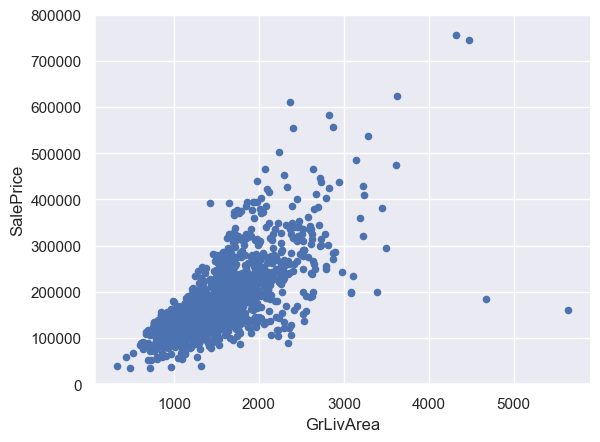

In [119]:
# bivariate analysis saleprice/grlivarea

data = pd.concat([train['SalePrice'], train['GrLivArea']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)    
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));   # Scatter plot with GrLivArea on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

- It looks live the two observations in the bottom right are outliers. Maybe they refer to agricultural area and could explain the low price.
- The two observations in the top of the plot are special, but they seem to be following the trend so we'll leave them in

In [120]:
# Removing the two outliers in the bottom right corner
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)

Now, lets move on to OverallQual:

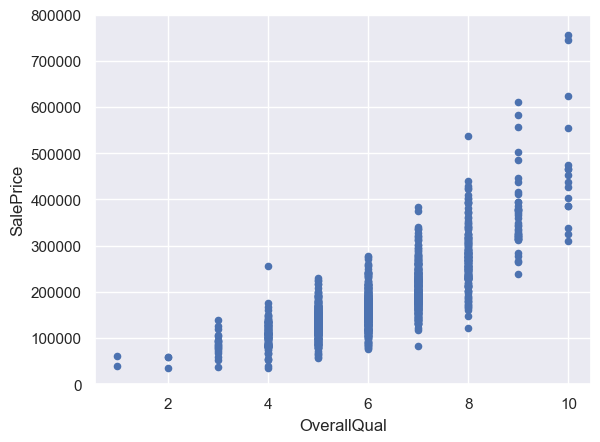

In [122]:
data = pd.concat([train['SalePrice'], train['OverallQual']], axis=1)  # Concatenate the two columns into a new DataFrame. axis=1 means we are concatenating columns (not rows)
data.plot.scatter(x='OverallQual', y='SalePrice', ylim=(0,800000));   # Scatter plot with OverallQual on the x-axis and SalePrice on the y-axis. ylim sets the y-axis limits

No evident outliers. Could test more variables, but the intuitively no others would make sense to test here.

# Section 4: Testing for assumptions

According to Hair et al. (2013), four assumptions should be tested:

1. **Normality**- When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for 'SalePrice' (which is a limited approach). Remember that univariate normality doesn't ensure multivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (>200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.

2.  **Homoscedasticity** - I just hope I wrote it right. Homoscedasticity refers to the 'assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s)' (Hair et al., 2013). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.

3.  **Linearity**- The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.

4. **Absence of correlated errors** - Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occurs often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.


# Section 5: Create dummy variables & revisualise

Now, we can visualise our clean data:

Now, we can export the clean data, and start using it for analysis!